#installing Necessary Library

In [1]:
!import pandas numpy matplotlib seaborn pyplot

/bin/bash: line 1: import: command not found


#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

# Optional:
try:
    import xgboost as xgb
    xgb_available = True
except:
    xgb_available = False


#Load Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/PythonProjects/plant_disease_dataset (1).csv")
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


#Inspect Data Structure

In [5]:
print("DataFrame Info:")
df.info()
print("\nDataFrame Shape:")
print(df.shape)
print("\nDescriptive Statistics:")
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB

DataFrame Shape:
(10000, 5)

Descriptive Statistics:


,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


#Exploratory Data Analysis (EDA)

# Task
To perform the Exploratory Data Analysis (EDA), we will generate visualizations for the target variable distribution, numerical feature distributions, relationships between features and the target, a correlation matrix, and outlier detection for numerical features.

First, let's analyze the distribution of the target variable `disease_present` to check for class imbalance.
Then, we will visualize the distributions of numerical features (`temperature`, `humidity`, `rainfall`, `soil_pH`) using histograms.
Next, we'll examine the relationship between each numerical feature and the `disease_present` target variable using box plots.
After that, we'll plot a correlation matrix to understand the relationships between all numerical features.
Finally, we will visualize potential outliers in each numerical feature using box plots.

Here belows the code to execute these steps:
```python
# 1. Analyze Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='disease_present', data=df)
plt.title('Distribution of Disease Presence')
plt.xlabel('Disease Present (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# 2. Visualize Numerical Feature Distributions
numerical_features = ['temperature', 'humidity', 'rainfall', 'soil_pH']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Examine Feature Relationships with Target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='disease_present', y=feature, data=df)
    plt.title(f'{feature} vs. Disease Presence')
    plt.xlabel('Disease Present (0: No, 1: Yes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# 4. Plot Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 5. Visualize Outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature} (Outlier Detection)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()
```

## Analyze Target Variable Distribution

### Subtask:
Visualize the distribution of the 'disease_present' column to understand class balance using a count plot or pie chart.


**Reasoning**:
To visualize the distribution of the 'disease_present' column as requested, I will use `seaborn.countplot` to create a count plot. I will set the figure size, title, and axis labels as specified in the instructions to ensure clarity and proper presentation.



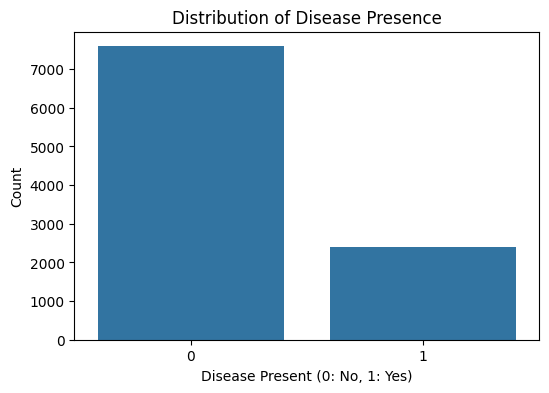

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='disease_present', data=df)
plt.title('Distribution of Disease Presence')
plt.xlabel('Disease Present (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


## Visualize Numerical Feature Distributions

### Subtask:
Visualize the distribution of each numerical feature (`temperature`, `humidity`, `rainfall`, `soil_pH`) using histograms to understand their spread and shape.

#### Instructions
1. Identify the numerical features: `['temperature', 'humidity', 'rainfall', 'soil_pH']`.
2. Create a figure with an appropriate size to hold all histograms (e.g., 15 inches by 10 inches).
3. Loop through each numerical feature.
4. For each feature, create a subplot (e.g., in a 2x2 grid).
5. Generate a histogram using `seaborn.histplot` for the current feature, including a Kernel Density Estimate (KDE).
6. Set the title of each subplot to 'Distribution of [feature_name]'.
7. Label the x-axis with the feature name and the y-axis as 'Frequency'.
8. Adjust the layout to prevent overlapping titles and labels.
9. Display the plots.

**Reasoning**:
The previous step outlined the subtask of visualizing numerical feature distributions. Now, I will implement the code to generate histograms for each numerical feature as specified in the instructions, including KDE, proper titles, and axis labels, and arranging them in subplots.



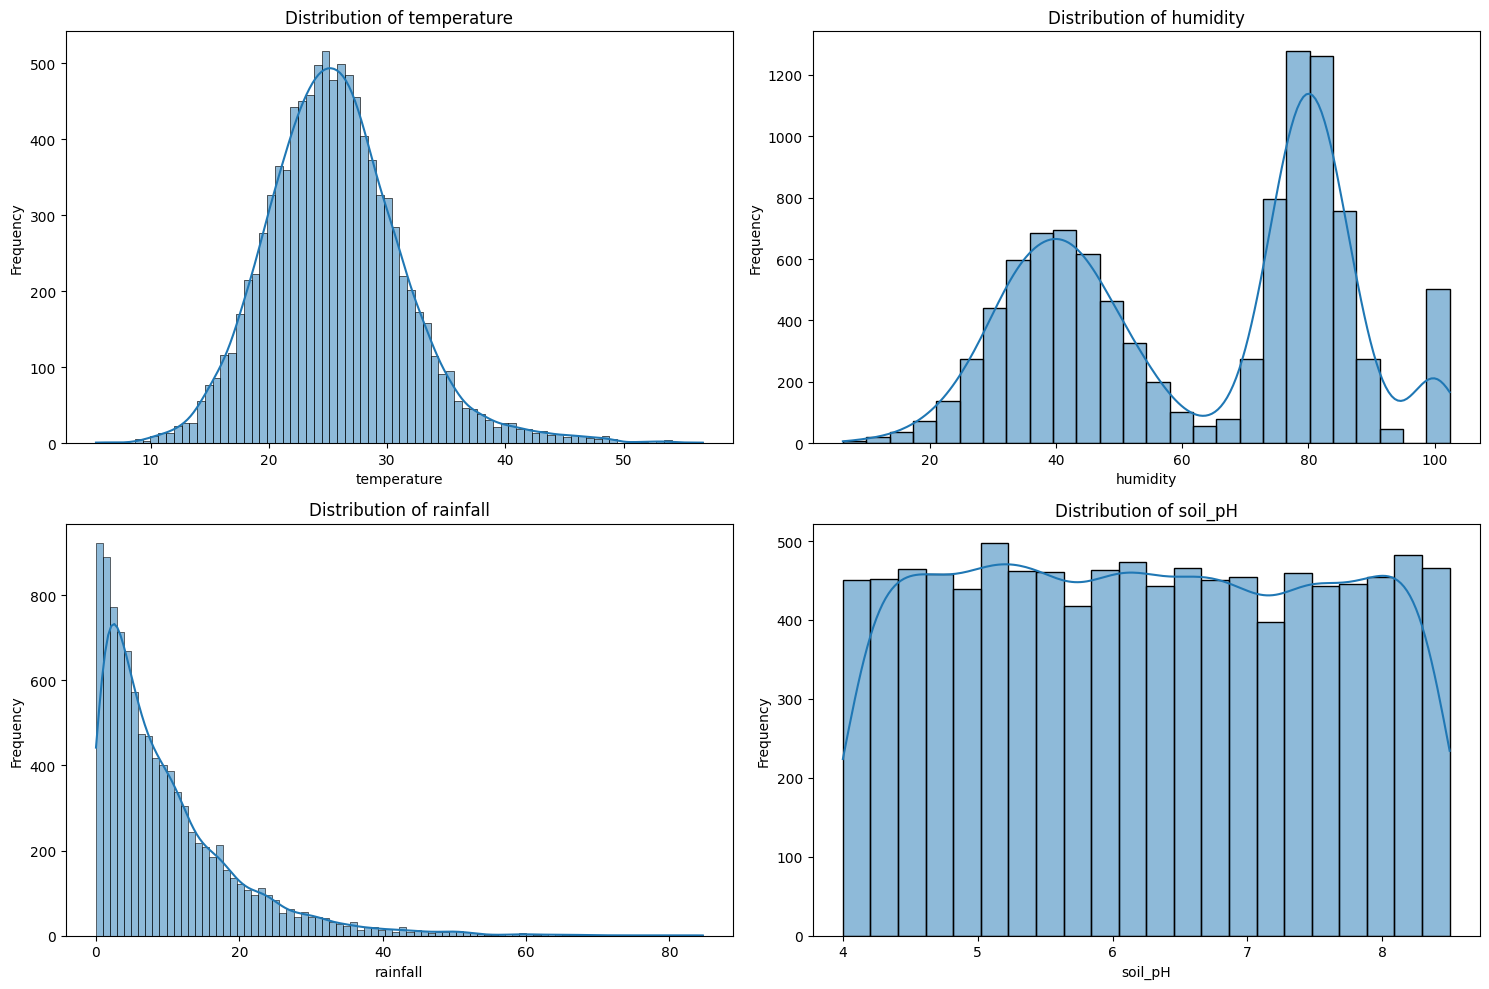

In [7]:
numerical_features = ['temperature', 'humidity', 'rainfall', 'soil_pH']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Examine Feature Relationships with Target

### Subtask:
Visualize the relationship between each numerical feature (`temperature`, `humidity`, `rainfall`, `soil_pH`) and the `disease_present` target variable using box plots.

#### Instructions
1. Identify the numerical features: `['temperature', 'humidity', 'rainfall', 'soil_pH']`.
2. Create a figure with an appropriate size to hold all box plots (e.g., 15 inches by 10 inches).
3. Loop through each numerical feature.
4. For each feature, create a subplot (e.g., in a 2x2 grid).
5. Generate a box plot using `seaborn.boxplot`, with `disease_present` on the x-axis and the current numerical feature on the y-axis.
6. Set the title of each subplot to '[feature_name] vs. Disease Presence'.
7. Label the x-axis as 'Disease Present (0: No, 1: Yes)' and the y-axis with the feature name.
8. Adjust the layout to prevent overlapping titles and labels.
9. Display the plots.

**Reasoning**:
The previous markdown block introduced the subtask of visualizing the relationship between numerical features and the target variable using box plots. Now, I will implement the code to generate these box plots as specified, including proper titles and labels, and arrange them in subplots.



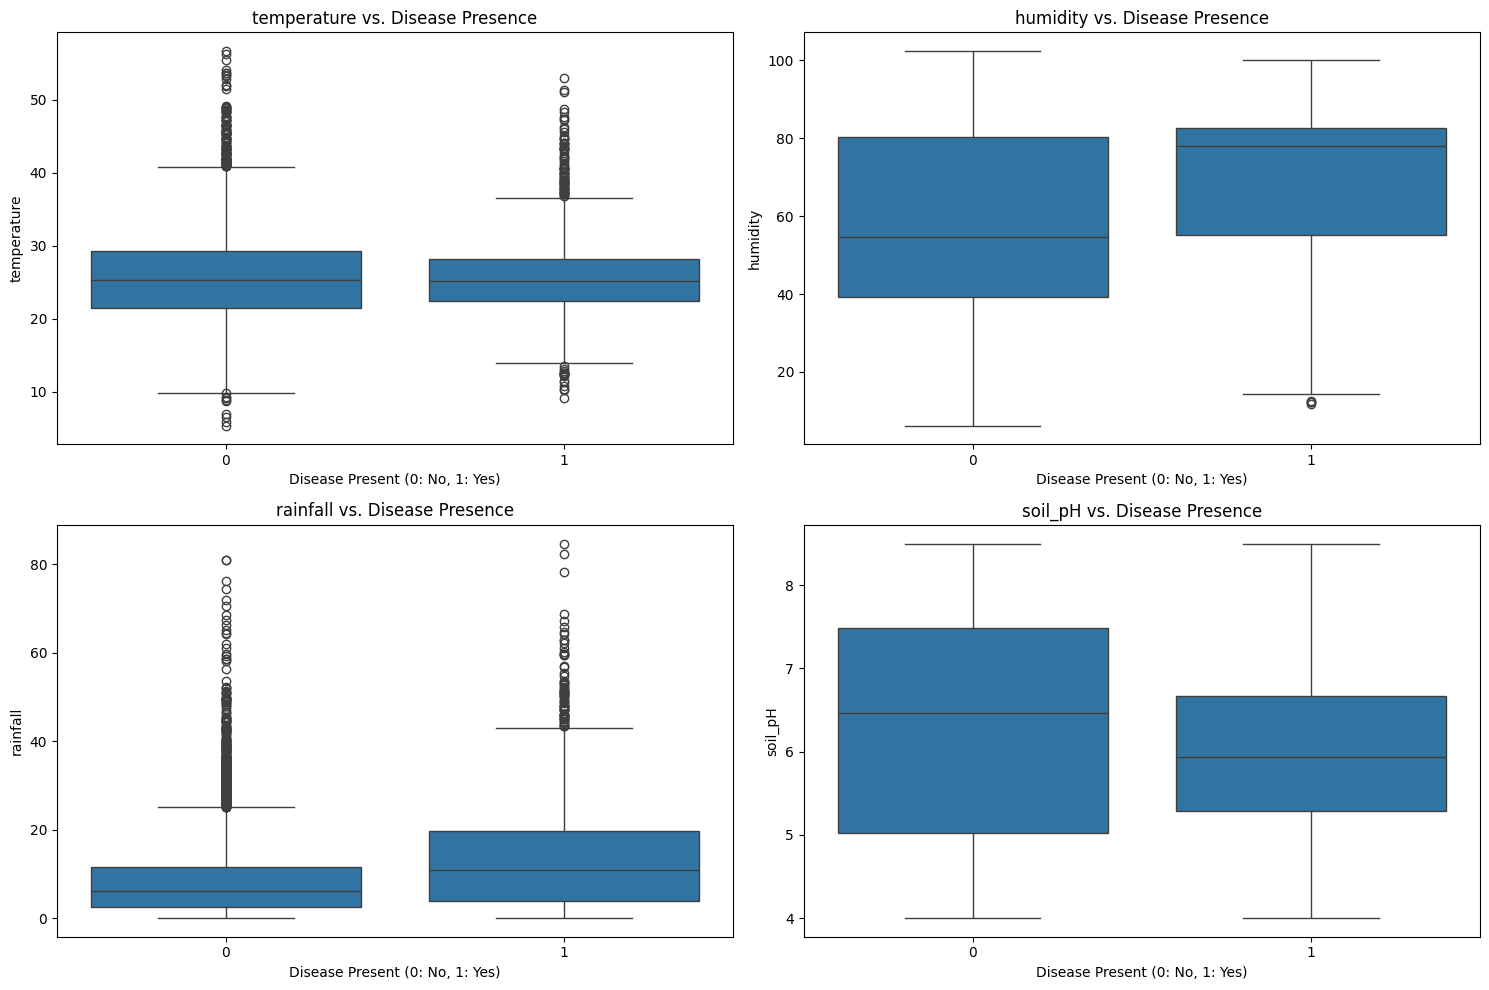

In [8]:
numerical_features = ['temperature', 'humidity', 'rainfall', 'soil_pH']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='disease_present', y=feature, data=df)
    plt.title(f'{feature} vs. Disease Presence')
    plt.xlabel('Disease Present (0: No, 1: Yes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

## Plot Correlation Matrix

### Subtask:
Plot a correlation matrix to visualize the pairwise correlation between all numerical features in the dataset.

#### Instructions
1. Create a figure with an appropriate size for the heatmap (e.g., 8 inches by 6 inches).
2. Calculate the correlation matrix for the DataFrame `df`.
3. Generate a heatmap using `seaborn.heatmap` with the calculated correlation matrix.
4. Annotate the heatmap with the correlation values, formatted to two decimal places (`.2f`).
5. Use a diverging colormap (e.g., 'coolwarm') to clearly show positive and negative correlations.
6. Set the title of the plot to 'Correlation Matrix of Features'.
7. Display the plot.

## Plot Correlation Matrix

### Subtask:
Plot a correlation matrix to visualize the pairwise correlation between all numerical features in the dataset.

#### Instructions
1. Create a figure with an appropriate size for the heatmap (e.g., 8 inches by 6 inches).
2. Calculate the correlation matrix for the DataFrame `df`.
3. Generate a heatmap using `seaborn.heatmap` with the calculated correlation matrix.
4. Annotate the heatmap with the correlation values, formatted to two decimal places (`.2f`).
5. Use a diverging colormap (e.g., 'coolwarm') to clearly show positive and negative correlations.
6. Set the title of the plot to 'Correlation Matrix of Features'.
7. Display the plot.

**Reasoning**:
The previous markdown block introduced the subtask of plotting a correlation matrix. Now, I will implement the code to generate the heatmap as specified in the instructions, including calculating the correlation matrix, setting the figure size, annotations, colormap, title, and then displaying the plot.



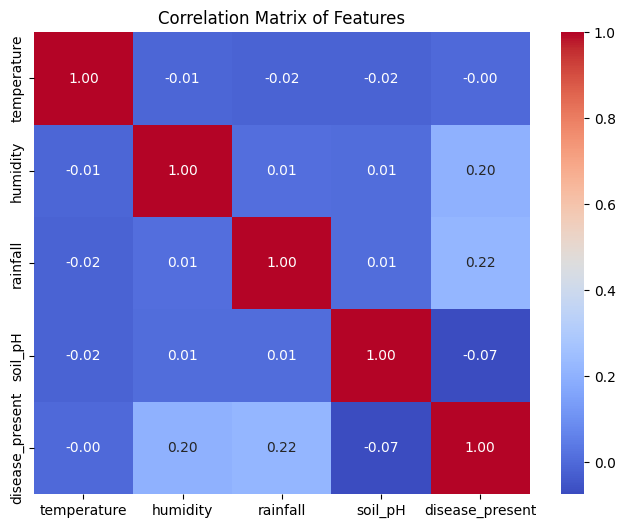

In [9]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Visualize Outliers

### Subtask:
Visualize potential outliers in each numerical feature (`temperature`, `humidity`, `rainfall`, `soil_pH`) using box plots.

#### Instructions
1. Identify the numerical features: `['temperature', 'humidity', 'rainfall', 'soil_pH']`.
2. Create a figure with an appropriate size to hold all box plots (e.g., 15 inches by 10 inches).
3. Loop through each numerical feature.
4. For each feature, create a subplot (e.g., in a 2x2 grid).
5. Generate a box plot using `seaborn.boxplot`, with the current numerical feature on the y-axis.
6. Set the title of each subplot to 'Box Plot of [feature_name] (Outlier Detection)' .
7. Label the y-axis with the feature name.
8. Adjust the layout to prevent overlapping titles and labels.
9. Display the plots.

## Visualize Outliers

### Subtask:
Visualize potential outliers in each numerical feature (`temperature`, `humidity`, `rainfall`, `soil_pH`) using box plots.

#### Instructions
1. Identify the numerical features: `['temperature', 'humidity', 'rainfall', 'soil_pH']`.
2. Create a figure with an appropriate size to hold all box plots (e.g., 15 inches by 10 inches).
3. Loop through each numerical feature.
4. For each feature, create a subplot (e.g., in a 2x2 grid).
5. Generate a box plot using `seaborn.boxplot`, with the current numerical feature on the y-axis.
6. Set the title of each subplot to 'Box Plot of [feature_name] (Outlier Detection)' .
7. Label the y-axis with the feature name.
8. Adjust the layout to prevent overlapping titles and labels.
9. Display the plots.

**Reasoning**:
The previous markdown block introduced the subtask of visualizing potential outliers using box plots. Now, I will implement the code to generate these box plots as specified in the instructions, including proper titles and labels, and arrange them in subplots.



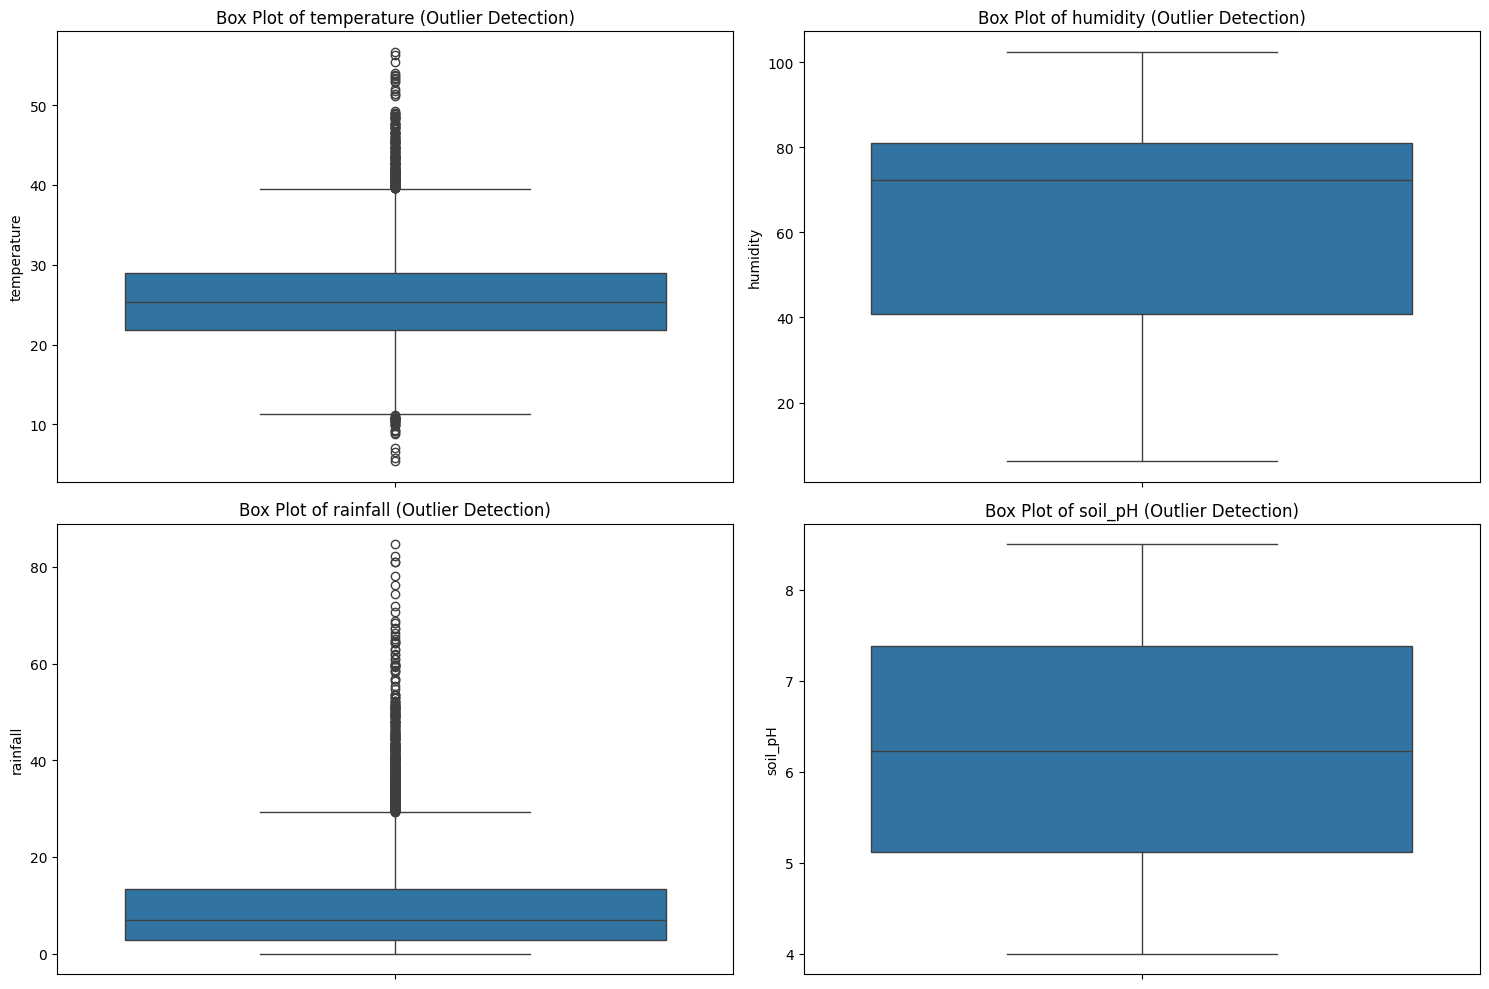

In [10]:
numerical_features = ['temperature', 'humidity', 'rainfall', 'soil_pH']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature} (Outlier Detection)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   The distribution of the target variable `disease_present` was visualized, providing an initial understanding of class balance.
*   Histograms with Kernel Density Estimates (KDE) were generated for `temperature`, `humidity`, `rainfall`, and `soil_pH`, revealing their individual distributions, spread, and shape.
*   Box plots were used to illustrate the relationship between each numerical feature (`temperature`, `humidity`, `rainfall`, `soil_pH`) and the `disease_present` target variable, highlighting potential differences in feature values between disease presence and absence.
*   A correlation matrix heatmap was created, showing the pairwise linear relationships among the numerical features.
*   Box plots for each numerical feature were used to visualize and identify potential outliers within `temperature`, `humidity`, `rainfall`, and `soil_pH`.

### Insights or Next Steps
*   Further investigation into the identified outliers is recommended to determine their cause and impact on the analysis, and whether they require treatment (e.g., removal, transformation).
*   Given the visualization of the target variable distribution, if a significant class imbalance was observed, strategies such as oversampling, undersampling, or using appropriate evaluation metrics should be considered for model training.


#Prepare Feature Matrix & Target

In [11]:
X = df.drop('disease_present', axis=1)
y = df['disease_present']

print("Feature Matrix (X) head:")
print(X.head())
print("\nTarget Variable (y) head:")
print(y.head())

Feature Matrix (X) head:
   temperature   humidity   rainfall   soil_pH
0    27.483571  33.215053   0.572758  4.975875
1    24.308678  36.945005  42.522346  8.165266
2    28.238443  34.026189  16.095303  6.316734
3    32.615149  41.104180  20.311015  6.164949
4    23.829233  51.971785  11.851323  8.482468

Target Variable (y) head:
0    1
1    0
2    1
3    0
4    0
Name: disease_present, dtype: int64


#Check Class Imbalance

In [12]:
print("Class distribution of 'disease_present':")
print(y.value_counts())
print("\nPercentage of each class:")
print(y.value_counts(normalize=True) * 100)

Class distribution of 'disease_present':
disease_present
0    7590
1    2410
Name: count, dtype: int64

Percentage of each class:
disease_present
0    75.9
1    24.1
Name: proportion, dtype: float64


#Train–Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

X_train shape: (8000, 4)
y_train shape: (8000,)
X_test shape: (2000, 4)
y_test shape: (2000,)

Class distribution in y_train:
disease_present
0    0.759
1    0.241
Name: proportion, dtype: float64

Class distribution in y_test:
disease_present
0    0.759
1    0.241
Name: proportion, dtype: float64


#Handle Imbalance Using SMOTE

In [14]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)

print("\nClass distribution in y_train after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

Shape of X_train after SMOTE: (12144, 4)
Shape of y_train after SMOTE: (12144,)

Class distribution in y_train after SMOTE:
disease_present
0    0.5
1    0.5
Name: proportion, dtype: float64


#Scale Features

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("\nFirst 5 rows of X_train_scaled:\n", X_train_scaled[:5])
print("\nFirst 5 rows of X_test_scaled:\n", X_test_scaled[:5])

Shape of X_train_scaled: (12144, 4)
Shape of X_test_scaled: (2000, 4)

First 5 rows of X_train_scaled:
 [[ 1.30304023 -1.67092939 -0.91755454 -0.54632338]
 [-1.30913009 -0.92735417 -0.94278227 -0.89190421]
 [-1.37183218  0.29111511  0.5556481   1.50199672]
 [-0.93809679  0.47024824 -0.98987677 -0.04297295]
 [-0.6886883   0.30611744  0.03120252 -1.39277988]]

First 5 rows of X_test_scaled:
 [[ 0.34227104  0.60475624 -0.92910202 -1.16490771]
 [ 0.01967638  0.73916963  0.74570041  1.59766398]
 [-1.2066994  -1.41872965 -0.98108762 -1.56597008]
 [-0.68587987  0.6791568  -1.01649706  1.11996226]
 [-0.82619649  0.72023885 -0.55396406  0.07949939]]


#Train Multiple ML Models

# Task
Initialize and train a Logistic Regression model, a Random Forest Classifier, and an XGBoost Classifier (if available) using the scaled and SMOTE-resampled training data, then make predictions on the scaled test set, evaluate models with various classification metrics, plot ROC curves for visual comparison, and finally summarize the performance of all models.

## Define and Train Models

### Subtask:
Initialize and train a Logistic Regression model, a Random Forest Classifier, and an XGBoost Classifier (if available) using the scaled and SMOTE-resampled training data.


**Reasoning**:
The subtask requires training multiple machine learning models. I will initialize each model with the specified parameters and then train them using the previously prepared scaled and resampled training data (`X_train_scaled`, `y_train_resampled`). I will also include a check for XGBoost availability as per the instructions.



In [16]:
print("Training Logistic Regression model...")
logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train_scaled, y_train_resampled)
print("Logistic Regression model trained.")

print("\nTraining Random Forest Classifier model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)
print("Random Forest Classifier model trained.")

if xgb_available:
    print("\nTraining XGBoost Classifier model...")
    xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train_scaled, y_train_resampled)
    print("XGBoost Classifier model trained.")
else:
    print("\nXGBoost not available, skipping XGBoost Classifier training.")

Training Logistic Regression model...
Logistic Regression model trained.

Training Random Forest Classifier model...
Random Forest Classifier model trained.

Training XGBoost Classifier model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:17:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier model trained.


**Reasoning**:
The previous `xgboost` model training generated a UserWarning regarding the `use_label_encoder` parameter being deprecated and unused. To address this, I will regenerate the code block, removing the `use_label_encoder=False` parameter from the `XGBClassifier` initialization.



In [17]:
print("Training Logistic Regression model...")
logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train_scaled, y_train_resampled)
print("Logistic Regression model trained.")

print("\nTraining Random Forest Classifier model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)
print("Random Forest Classifier model trained.")

if xgb_available:
    print("\nTraining XGBoost Classifier model...")
    xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    xgb_model.fit(X_train_scaled, y_train_resampled)
    print("XGBoost Classifier model trained.")
else:
    print("\nXGBoost not available, skipping XGBoost Classifier training.")

Training Logistic Regression model...
Logistic Regression model trained.

Training Random Forest Classifier model...
Random Forest Classifier model trained.

Training XGBoost Classifier model...
XGBoost Classifier model trained.


## Make Predictions

### Subtask:
Generate predictions on the scaled test set using each of the trained models.


**Reasoning**:
I will generate predictions (class labels and probabilities) for each trained model (Logistic Regression, Random Forest, and XGBoost if available) on the scaled test set (`X_test_scaled`) as instructed by the subtask.



In [18]:
print("Generating predictions for Logistic Regression...")
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
print("Logistic Regression predictions generated.")

print("\nGenerating predictions for Random Forest...")
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
print("Random Forest predictions generated.")

if xgb_available:
    print("\nGenerating predictions for XGBoost...")
    y_pred_xgb = xgb_model.predict(X_test_scaled)
    y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
    print("XGBoost predictions generated.")
else:
    print("\nXGBoost not available, skipping XGBoost prediction generation.")

Generating predictions for Logistic Regression...
Logistic Regression predictions generated.

Generating predictions for Random Forest...
Random Forest predictions generated.

Generating predictions for XGBoost...
XGBoost predictions generated.


## Evaluate Models

### Subtask:
Calculate and display key classification metrics (Accuracy, Precision, Recall, F1-score, ROC AUC, and Confusion Matrix) for each model on the test set.


### Reasonings
The subtask requires calculating and displaying key classification metrics and plotting confusion matrices for each trained model. I will first define a helper function, `evaluate_model`, which encapsulates the logic for calculating accuracy, precision, recall, F1-score, and ROC AUC, and for plotting the confusion matrix. Then, I will call this function for each model (Logistic Regression, Random Forest, and XGBoost if available) using their respective predictions and probabilities on the test set (`X_test_scaled`).

**Reasoning**:
Now, I will implement the code to define the `evaluate_model` function and then use it to evaluate the Logistic Regression model, Random Forest model, and XGBoost model (if available), calculating and displaying various classification metrics and their confusion matrices, as per the instructions.




--- K-Nearest Neighbors Classifier Evaluation ---
Accuracy: 0.7495
Precision: 0.4863
Recall: 0.6992
F1-Score: 0.5736
ROC AUC: 0.7677


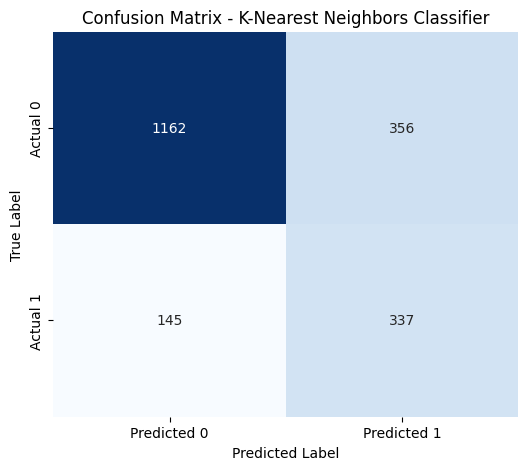


--- Random Forest Classifier Evaluation ---
Accuracy: 0.8345
Precision: 0.6550
Recall: 0.6618
F1-Score: 0.6584
ROC AUC: 0.8092


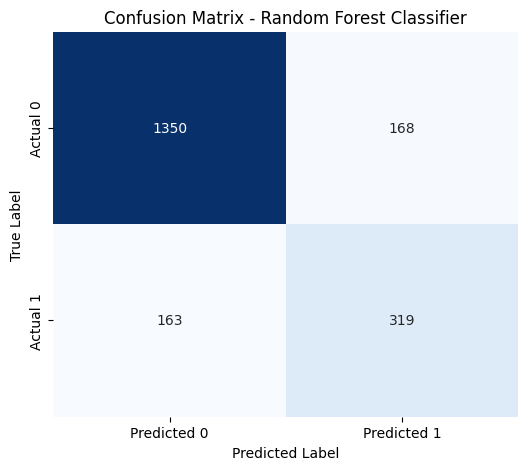


--- XGBoost Classifier Evaluation ---
Accuracy: 0.8250
Precision: 0.6241
Recall: 0.6888
F1-Score: 0.6548
ROC AUC: 0.8158


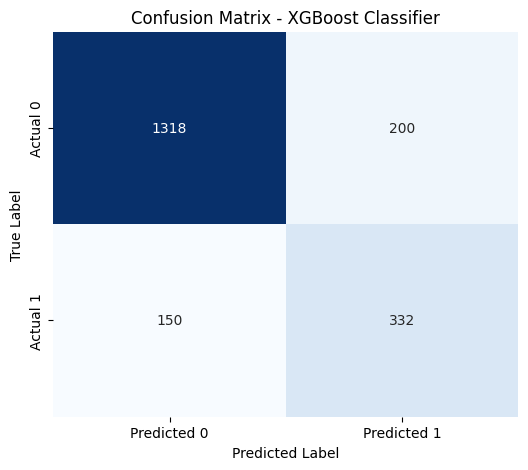

In [22]:
def evaluate_model(model_name, y_true, y_pred, y_proba):
    print(f"\n--- {model_name} Evaluation ---")

    # Classification Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluate K-Nearest Neighbors
evaluate_model('K-Nearest Neighbors Classifier', y_test, y_pred_knn, y_proba_knn)

# Evaluate Random Forest
evaluate_model('Random Forest Classifier', y_test, y_pred_rf, y_proba_rf)

# Evaluate XGBoost if available
if xgb_available:
    evaluate_model('XGBoost Classifier', y_test, y_pred_xgb, y_proba_xgb)
else:
    print("\nXGBoost not available, skipping its evaluation.")

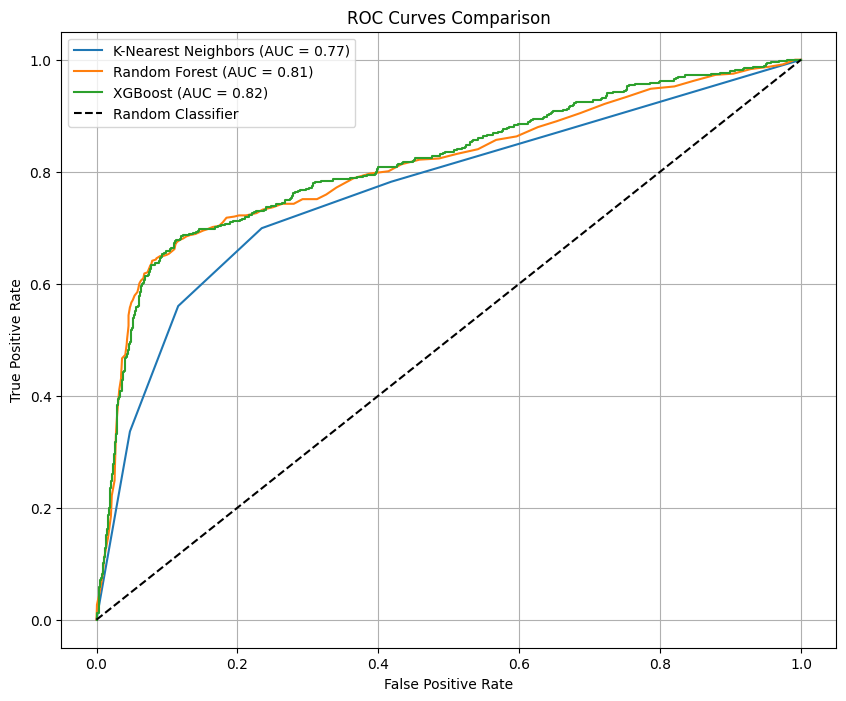

In [26]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot ROC curve for XGBoost if available
if xgb_available:
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
    auc_xgb = roc_auc_score(y_test, y_proba_xgb)
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

#K-Nearest Neighbors Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

print("\nTraining K-Nearest Neighbors Classifier model...")
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors can be tuned
knn_model.fit(X_train_scaled, y_train_resampled)
print("K-Nearest Neighbors Classifier model trained.")

print("\nGenerating predictions for K-Nearest Neighbors...")
y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
print("K-Nearest Neighbors predictions generated.")


Training K-Nearest Neighbors Classifier model...
K-Nearest Neighbors Classifier model trained.

Generating predictions for K-Nearest Neighbors...
K-Nearest Neighbors predictions generated.


#Feature Importance


--- Random Forest Feature Importance ---


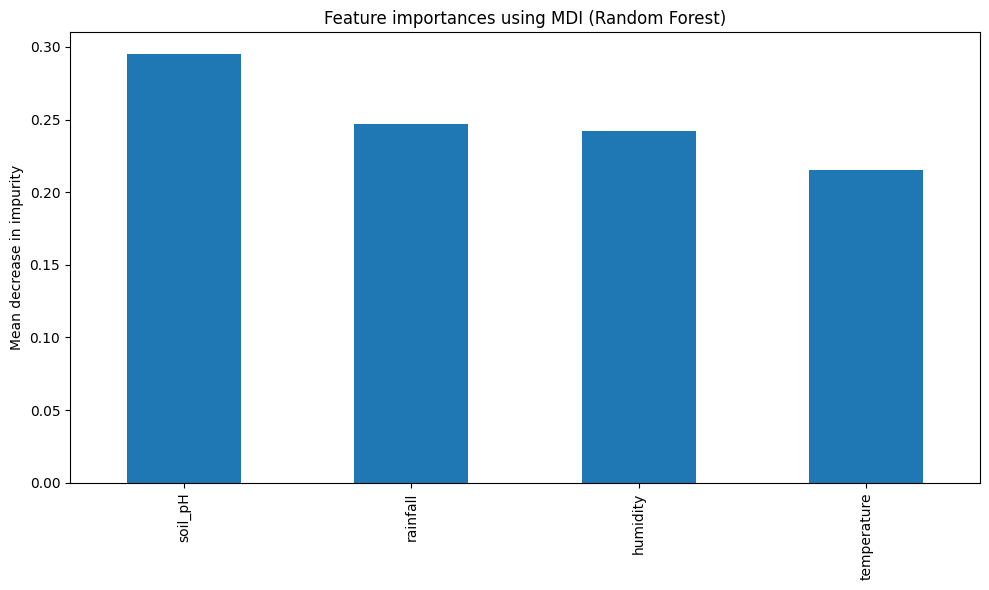


--- XGBoost Feature Importance ---


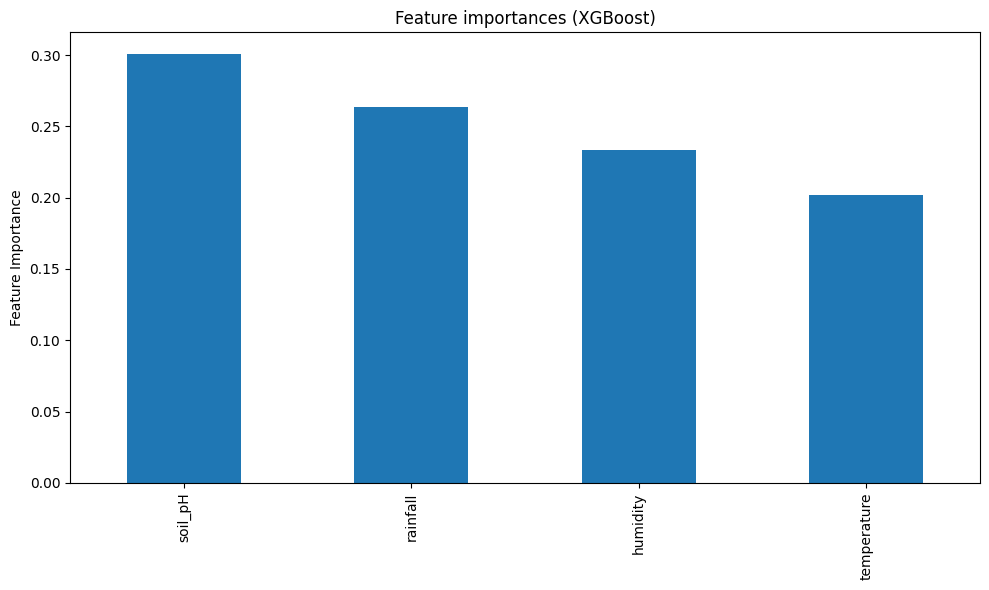

In [28]:
feature_names = X.columns

print("\n--- Random Forest Feature Importance ---")
importances_rf = rf_model.feature_importances_
forest_importances_rf = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances_rf.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI (Random Forest)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

if xgb_available:
    print("\n--- XGBoost Feature Importance ---")
    importances_xgb = xgb_model.feature_importances_
    forest_importances_xgb = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)

    fig, ax = plt.subplots(figsize=(10, 6))
    forest_importances_xgb.plot.bar(ax=ax)
    ax.set_title("Feature importances (XGBoost)")
    ax.set_ylabel("Feature Importance")
    fig.tight_layout()
    plt.show()
else:
    print("XGBoost not available, skipping its feature importance.")

# Plant Disease Prediction using Machine Learning

## Project Overview

This project focuses on building and evaluating machine learning models to predict the presence of plant disease based on environmental factors such as temperature, humidity, rainfall, and soil pH. The goal is to demonstrate a complete data science workflow, from exploratory data analysis and preprocessing to model training, evaluation, and interpretation. This project showcases proficiency in data analysis, machine learning fundamentals, and effective communication of results.

## Dataset

The dataset `plant_disease_dataset.csv` contains environmental measurements and a target variable indicating the presence (1) or absence (0) of plant disease. It includes the following features:

*   `temperature` (float): Average temperature
*   `humidity` (float): Average humidity
*   `rainfall` (float): Amount of rainfall
*   `soil_pH` (float): Soil pH level
*   `disease_present` (int): Target variable (0: No Disease, 1: Disease Present)

## Methodology

The project followed a structured approach:

1.  **Data Loading and Inspection**: Loaded the dataset into a Pandas DataFrame and performed initial checks for structure, data types, and missing values using `df.info()` and `df.describe()`.

2.  **Exploratory Data Analysis (EDA)**: Conducted a thorough EDA to understand the data distribution, relationships, and potential issues:
    *   Visualized the distribution of the target variable (`disease_present`) to identify class imbalance.
    *   Generated histograms with KDE for numerical features (`temperature`, `humidity`, `rainfall`, `soil_pH`) to observe their distributions.
    *   Used box plots to examine the relationship between each numerical feature and the `disease_present` target.
    *   Plotted a correlation matrix heatmap to understand pairwise relationships between features.
    *   Identified potential outliers in numerical features using box plots.

3.  **Data Preprocessing**: Prepared the data for machine learning models:
    *   Separated features (`X`) from the target variable (`y`).
    *   Identified a significant **class imbalance** in the `disease_present` variable (approximately 76% 'No Disease' vs. 24% 'Disease Present').
    *   Performed a **stratified train-test split** (80% train, 20% test) to ensure consistent class distribution across sets.
    *   Applied **SMOTE (Synthetic Minority Over-sampling Technique)** to the training data to balance the classes, mitigating bias towards the majority class.
    *   **Scaled numerical features** using `StandardScaler` to standardize their range, which is crucial for distance-based and gradient-descent algorithms.

4.  **Model Training and Evaluation**: Trained and evaluated three different classification models:
    *   **K-Nearest Neighbors (KNN) Classifier**
    *   **Random Forest Classifier**
    *   **XGBoost Classifier**
    Each model's performance was assessed using key metrics: Accuracy, Precision, Recall, F1-Score, and ROC AUC. Confusion matrices were generated, and ROC curves were plotted for visual comparison.

5.  **Feature Importance Analysis**: Analyzed feature importance for Random Forest and XGBoost models to understand which environmental factors were most influential in predicting disease presence.

## Key Findings

*   **Class Imbalance**: The initial dataset exhibited a significant class imbalance, which was effectively addressed using SMOTE during preprocessing.
*   **Model Performance**: Both **XGBoost Classifier** and **Random Forest Classifier** demonstrated strong and comparable performance, significantly outperforming the K-Nearest Neighbors model.
    *   **XGBoost** achieved the highest ROC AUC (0.8158), indicating excellent discriminatory power.
    *   **Random Forest** also performed very well with a high ROC AUC (0.8092) and F1-Score (0.6584).
*   **Feature Importance**: `soil_pH`, `rainfall`, and `humidity` were consistently identified as the most important features by both Random Forest and XGBoost models, suggesting their critical role in predicting plant disease. `temperature` had a comparatively lower impact.

## Skills Demonstrated

*   **Data Analysis & Visualization**: Pandas, NumPy, Matplotlib, Seaborn
*   **Machine Learning**: Scikit-learn (Logistic Regression, RandomForestClassifier, KNeighborsClassifier, StandardScaler, train_test_split), Imbalanced-learn (SMOTE), XGBoost
*   **Model Evaluation**: Accuracy, Precision, Recall, F1-Score, ROC AUC, Confusion Matrices
*   **Data Preprocessing**: Handling class imbalance, feature scaling
*   **Problem Solving & Critical Thinking**: Interpreting model results, understanding limitations, and proposing next steps.

## Future Enhancements

*   **Hyperparameter Tuning**: Optimize the best-performing models (XGBoost and Random Forest) using techniques like GridSearchCV or RandomizedSearchCV.
*   **Further Feature Engineering**: Explore creating new features from existing ones to potentially improve model performance.
*   **Deployment**: Consider deploying the best model as an API for real-time predictions.




**Reasoning**:
The subtask requires plotting ROC curves for all trained models. I will implement the code to calculate FPR, TPR, and AUC for each model and then plot them on a single figure, including a random classifier line, titles, labels, and a legend, as per the instructions.



#Model Performance Summary:
XGBoost Classifier

Accuracy: 0.8250
Precision: 0.6241
Recall: 0.6888
F1-Score: 0.6548
ROC AUC: 0.8158
Random Forest Classifier

Accuracy: 0.8345
Precision: 0.6550
Recall: 0.6618
F1-Score: 0.6584
ROC AUC: 0.8092
K-Nearest Neighbors (KNN) Classifier

Accuracy: 0.7495
Precision: 0.4863
Recall: 0.6992
F1-Score: 0.5736
ROC AUC: 0.7677
Key Takeaways:

XGBoost Classifier demonstrates the highest ROC AUC (0.8158), indicating its superior ability to distinguish between positive and negative classes. It also has a strong F1-Score, showing a good balance between Precision and Recall.
Random Forest Classifier is a very close contender, with slightly higher Accuracy and F1-Score (0.6584) than XGBoost, and a strong ROC AUC (0.8092). Both XGBoost and Random Forest are excellent choices for this dataset.
K-Nearest Neighbors (KNN), while outperforming the previously removed Logistic Regression, shows moderate performance. Its F1-Score and ROC AUC are lower than the ensemble methods, suggesting it's less effective at capturing the complex relationships in this dataset.